# Example 2: 
 Consider $p=3$ measurements (mass, height, and age) for $N=10$  students.

(a) Create a matrix of observations where each row represents a measurement and each column represents a student.

(b) Visualize the observations using a scatter plot.

(c) Compute the sample mean and display it on the scatter plot.

(d) Compute and print the covariance matrix.
  


Matrix of observations (p x N):
[[ 60  72  68  80  55  65  78  58  62  74]
 [170 180 175 185 165 172 182 168 174 178]
 [ 20  21  19  22  18  20  23  19  20  21]]

Sample mean (center of the scatterplot):
[ 67.2 174.9  20.3]

Matrix B in mean-deviation form:
[[ -7.2   4.8   0.8  12.8 -12.2  -2.2  10.8  -9.2  -5.2   6.8]
 [ -4.9   5.1   0.1  10.1  -9.9  -2.9   7.1  -6.9  -0.9   3.1]
 [ -0.3   0.7  -1.3   1.7  -2.3  -0.3   2.7  -1.3  -0.3   0.7]]

Covariance matrix S:
[[74.17777778 53.57777778 11.37777778]
 [53.57777778 40.76666667  8.47777778]
 [11.37777778  8.47777778  2.23333333]]


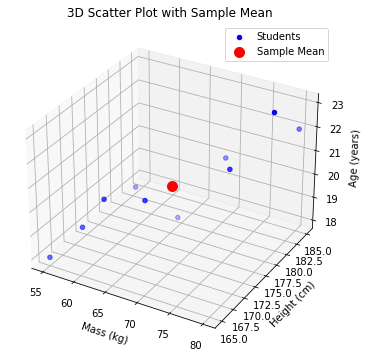

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Data: 10 students, 3 measurements (mass, height, age)
data = np.array([
    [60, 170, 20],
    [72, 180, 21],
    [68, 175, 19],
    [80, 185, 22],
    [55, 165, 18],
    [65, 172, 20],
    [78, 182, 23],
    [58, 168, 19],
    [62, 174, 20],
    [74, 178, 21]
]).T  # Transpose to make it 3 x 10

# Compute sample mean
mean_vector = np.mean(data, axis=1)

# Center the data: X_k - M
B = data - mean_vector[:, np.newaxis]

# Covariance matrix using S = (1/(N-1)) * B * B^T
N = data.shape[1]
cov_matrix = (1 / (N - 1)) * np.dot(B, B.T)

# Display matrix of observations
print("Matrix of observations (p x N):")
print(data)

print("\nSample mean (center of the scatterplot):")
print(mean_vector)

print("\nMatrix B in mean-deviation form:")
print(B)

print("\nCovariance matrix S:")
print(cov_matrix)


# Create scatter plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Plot individual points
ax.scatter(data[0, :], data[1, :], data[2, :], color='blue', label='Students')

# Plot sample mean
ax.scatter(mean_vector[0], mean_vector[1], mean_vector[2], color='red', s=100, label='Sample Mean')

# Labels and title
ax.set_xlabel('Mass (kg)')
ax.set_ylabel('Height (cm)')
ax.set_zlabel('Age (years)')
ax.set_title('3D Scatter Plot with Sample Mean')
ax.legend()
plt.savefig('scatterplot.png',dpi=300)
plt.show()


# Example 3:
Assume that the covariance matrix associated with some data set is  given as $S=\left[\begin{array}{ccc} 2382.78 & 2611.84 & 2136.20\\ 2611.84 & 3106.47 & 2553.90\\ 2136.20 & 2553.90 & 2650.71\end{array}\right]$. 
 
 (a) Find the principal components of the data.
 
 (b) List the new variable determined by the first principal component.
 
 (c) Compute the percentages of the total variance explained by the principal components and provide their interpretation.
 


In [5]:
import numpy as np

# Covariance matrix S
S = np.array([[2382.78, 2611.84, 2136.20],
              [2611.84, 3106.47, 2553.90],
              [2136.20, 2553.90, 2650.71]])

# (a) Find eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(S)

# Sort eigenvalues and eigenvectors in descending order
idx = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:, idx]

print("Eigenvalues:")
print(eigenvalues)

print("\nPrincipal components (eigenvectors):")
print(eigenvectors)

# (b) Define the new variable for the first principal component
u1 = eigenvectors[:, 0]
print("\nNew variable determined by the first principal component:")
print(f"y1 = {u1[0]:.2f} * x1 + {u1[1]:.2f} * x2 + {u1[2]:.2f} * x3")

# (c) Compute percentages of the total variance explained
total_variance = np.sum(eigenvalues)
explained_variance_ratio = eigenvalues / total_variance * 100

print("\nPercentage of total variance explained by each component:")
for i, ratio in enumerate(explained_variance_ratio):
    print(f"Component {i+1}: {ratio:.1f}%")

# Verify that the trace of S equals the sum of eigenvalues
trace_S = np.trace(S)
print(f"\nTotal variance (trace of S): {trace_S:.2f}")
print(f"Sum of eigenvalues: {np.sum(eigenvalues):.2f}")


Eigenvalues:
[7614.23008449  427.62510617   98.10480934]

Principal components (eigenvectors):
[[-0.5417295  -0.48936059 -0.68341448]
 [-0.62947576 -0.30262298  0.71566724]
 [-0.55703627  0.81789091 -0.14410084]]

New variable determined by the first principal component:
y1 = -0.54 * x1 + -0.63 * x2 + -0.56 * x3

Percentage of total variance explained by each component:
Component 1: 93.5%
Component 2: 5.3%
Component 3: 1.2%

Total variance (trace of S): 8139.96
Sum of eigenvalues: 8139.96


# Example 4: 
Given the weights and heights of five kids,
   (a) Find the covariance matrix for the data.
   (b) Make a principal component analysis of the data to find a single size index that explains most of the variation in the data. 
   


Covariance Matrix:
 [[100.   47.5]
 [ 47.5  25. ]]

Eigenvalues:
 [123.01859218   1.98140782]

Principal components (eigenvectors):
[[ 0.89990119 -0.43609386]
 [ 0.43609386  0.89990119]]

New variable determined by the first principal component:
y1 = 0.90 * x1 + 0.44 * x2

Percentage of total variance explained by each component:
Component 1: 98.4%
Component 2: 1.6%


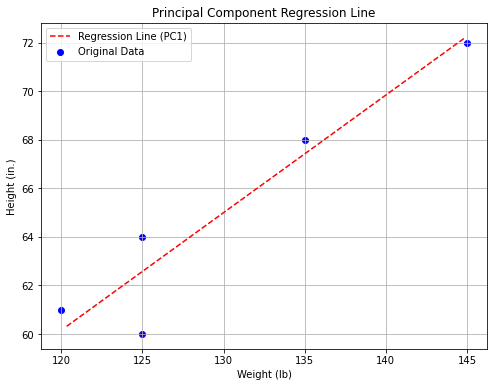

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Data (weights and heights)
weights = np.array([120, 125, 125, 135, 145])
heights = np.array([61, 60, 64, 68, 72])

# Combine weights and heights into a data matrix
data = np.vstack((weights, heights)).T

# (a) Covariance matrix calculation
# Calculate the mean of the data
mean = np.mean(data, axis=0)

# Subtract the mean from each data point to get the mean-deviation form
data_centered = data - mean

# Calculate the covariance matrix
cov_matrix = np.cov(data_centered.T)
print("Covariance Matrix:\n", cov_matrix)

# Eigenvalues and Eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Print eigenvalues and eigenvectors
print("\nEigenvalues:\n", eigenvalues)
print("\nPrincipal components (eigenvectors):")
print(eigenvectors)

# (b) Define the new variable for the first principal component
u1 = eigenvectors[:, 0]
print("\nNew variable determined by the first principal component:")
print(f"y1 = {u1[0]:.2f} * x1 + {u1[1]:.2f} * x2")

# (c) Compute percentages of the total variance explained
total_variance = np.sum(eigenvalues)
explained_variance_ratio = eigenvalues / total_variance * 100

print("\nPercentage of total variance explained by each component:")
for i, ratio in enumerate(explained_variance_ratio):
    print(f"Component {i+1}: {ratio:.1f}%")
    
# --- Plotting the Regression Line determined by the first principal component ---

# Project the data onto the first principal component (PC1)
pc1_projection = data_centered.dot(u1)

# Get the points along the first principal component
pc1_points = np.outer(pc1_projection, u1) + mean  # reconstruct the points from the projection

# Plotting the original data points and the regression line
plt.figure(figsize=(8, 6))
plt.scatter(data[:, 0], data[:, 1], color='blue', label="Original Data")
plt.plot(pc1_points[:, 0], pc1_points[:, 1], color='red', label="Regression Line (PC1)", linestyle='--')

# Add labels and title
plt.xlabel("Weight (lb)")
plt.ylabel("Height (in.)")
plt.title("Principal Component Regression Line")

# Show legend and plot
plt.legend()
plt.grid(True)
plt.show()


# Example 5: 
Given a dataset of student scores in Math, Science, and English, along with the time spent studying, perform Principal Component Analysis (PCA) to identify the most important components that explain the variance in the data.

Principal Components (Vt):
[[-0.60913182 -0.6099611  -0.50535099  0.03906753]
 [-0.57487179 -0.06005934  0.78315034  0.22932696]
 [-0.51990587  0.78969812 -0.32536208  0.01463828]
 [-0.16786526 -0.02678075  0.15948496 -0.97245493]]

Explained Variance (Eigenvalues) for each component:
[1.73870158e+02 5.33028574e+00 1.58038586e+00 1.30281113e-01]

Explained Variance Ratio (Percentage of Total Variance):
Component 1: 96.11%
 
Component 2: 2.95%
 
Component 3: 0.87%
 
Component 4: 0.07%
 
Projected data for student 1 -7.672176407891133 -0.8882214681991243
Projected data for student 2 4.338692396002187 3.316272017241464
Projected data for student 3 -16.11748026175786 -2.8326075951211824
Projected data for student 4 1.535142083948472 -2.2495272736252523
Projected data for student 5 19.414030494692227 1.9328192919138014
Projected data for student 6 10.62383778345913 0.8547217056567078
Projected data for student 7 -14.477227664153945 2.3630269676722175
Projected data for student 8 -5.93400690

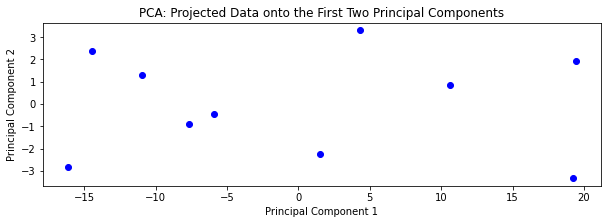

In [40]:
import numpy as np
import matplotlib.pyplot as plt

# Example data: Math, Science, English scores, and Time spent studying
data = np.array([
    [90, 85, 88, 10],  # Student 1
    [80, 78, 85, 8],   # Student 2
    [95, 92, 90, 12],  # Student 3
    [85, 80, 82, 9],   # Student 4
    [70, 72, 75, 6],   # Student 5
    [78, 74, 80, 7],   # Student 6
    [92, 89, 94, 11],  # Student 7
    [88, 85, 87, 10],  # Student 8
    [75, 70, 72, 5],   # Student 9
    [90, 88, 91, 10]   # Student 10
])

# Step 1: Center the data (subtract the mean of each feature)
mean_data = np.mean(data, axis=0)
centered_data = data - mean_data

# Step 2: Perform Singular Value Decomposition (SVD)
U, Sigma, Vt = np.linalg.svd(centered_data, full_matrices=False)

# Step 3: The right singular vectors (Vt) are the principal components
principal_components = Vt.T

# Step 4: The singular values represent the variance explained by each principal component
explained_variance = Sigma**2 / (data.shape[0] - 1)

# Step 5: Variance explained by each component (percentage of total variance)
total_variance = np.sum(explained_variance)
explained_variance_ratio = explained_variance / total_variance * 100

# Step 6: Project the data onto the principal components
projected_data = np.dot(centered_data, principal_components)

# Output results
print("Principal Components (Vt):")
print(principal_components)

print("\nExplained Variance (Eigenvalues) for each component:")
print(explained_variance)

print("\nExplained Variance Ratio (Percentage of Total Variance):")
for i, ratio in enumerate(explained_variance_ratio):
    print(f"Component {i + 1}: {ratio:.2f}%"), print(' ')

for i in range(0, 10): 
    print("Projected data for student", i+1, projected_data[i,0], projected_data[i,1])

# Visualize the projected data
fig = plt.figure(figsize=(10,3))
plt.scatter(projected_data[:, 0], projected_data[:, 1], c='blue')
plt.title('PCA: Projected Data onto the First Two Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.savefig('example_PCA.png',dpi=300)
plt.show()



# Example 6:

Correlation Matrix for Standardized Data:
                           Gun Law Strength  Population in 2020  \
Gun Law Strength                   1.000000           -0.408291   
Population in 2020                -0.408291            1.000000   
Number of Registered Guns         -0.188227            0.890911   
Gun Death Rate Per 100K            0.769098           -0.249806   

                           Number of Registered Guns  Gun Death Rate Per 100K  
Gun Law Strength                           -0.188227                 0.769098  
Population in 2020                          0.890911                -0.249806  
Number of Registered Guns                   1.000000                -0.001871  
Gun Death Rate Per 100K                    -0.001871                 1.000000  


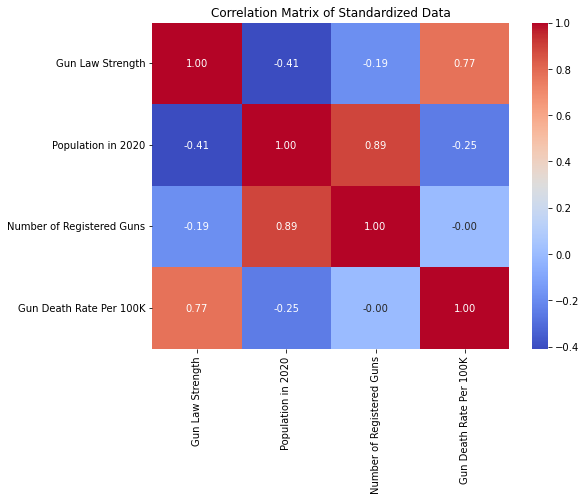

Singular Values:
[2.27748848 1.4359776  0.2122218  0.07431213]

Explained Variance (Eigenvalues) for each component:
[0.2881641  0.11455731 0.00250212 0.00030679]

Explained Variance Ratio (Percentage of Total Variance):
Component 1: 71.06%
Component 2: 28.25%
Component 3: 0.62%
Component 4: 0.08%

Principal Components (Vt):
[[-0.50855907 -0.45571788  0.72798154  0.06108813]
 [ 0.5789408  -0.36907263  0.11313336  0.71820177]
 [ 0.47929639 -0.55491023  0.04439268 -0.67851226]
 [-0.42008355 -0.59006884 -0.67473921  0.14168826]]


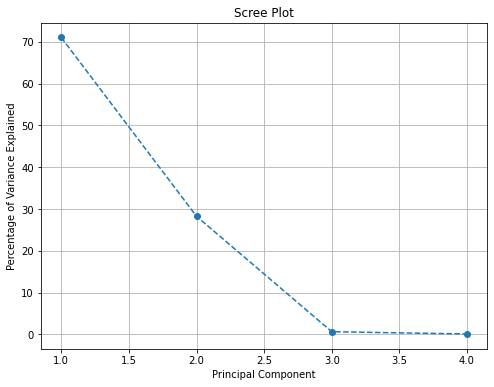

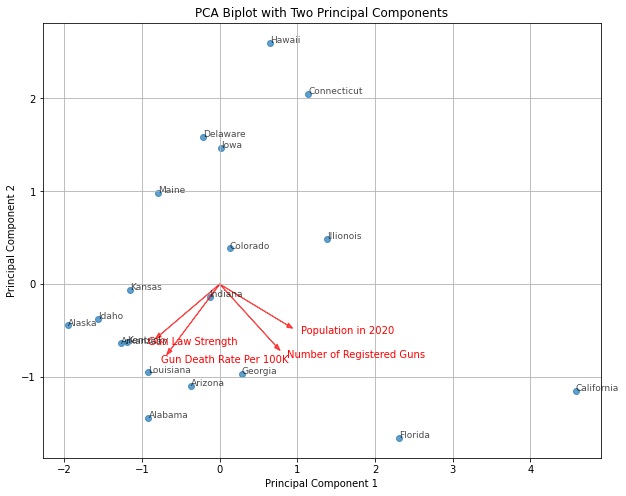

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Load the Excel file, skipping the first row (header row)
file_path = 'gun_law1.xlsx'  # Replace with the path to your Excel file
df = pd.read_excel(file_path, header=0)  # Treat the first row as column headers

# Extract columns 2, 3, 4, and 5 for PCA (indexing starts from 0, so use columns 1, 2, 3, 4)
matrix = df.iloc[:, 1:5].to_numpy()  # Select columns 2 to 5 (index 1 to 4)

# Extract the labels from the first column (index 0)
labels = df.iloc[:, 0].to_numpy()

# Standardize the matrix (mean=0, variance=1 for each feature)
scaler = StandardScaler()
standardized_matrix = scaler.fit_transform(matrix)

# Create a pandas DataFrame for standardized data
standardized_df = pd.DataFrame(standardized_matrix, columns=df.columns[1:5])

# Compute the correlation matrix for the standardized data
correlation_matrix = standardized_df.corr()

# Print the correlation matrix
print("Correlation Matrix for Standardized Data:")
print(correlation_matrix)


# Optional: Visualize the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation Matrix of Standardized Data')
plt.savefig('correlation_matrix.png', bbox_inches='tight')  
plt.show()

# Perform Singular Value Decomposition (SVD) on the correlation matrix
U, Sigma, Vt = np.linalg.svd(correlation_matrix, full_matrices=False)

# The right singular vectors (Vt) are the principal components
principal_components = Vt.T

# The singular values represent the variance explained by each principal component
explained_variance = Sigma**2 / (standardized_matrix.shape[0] - 1)

# Variance explained by each component (percentage of total variance)
total_variance = np.sum(explained_variance)
explained_variance_ratio = explained_variance / total_variance * 100

# Step 6: Project the data onto the principal components
projected_data = np.dot(standardized_matrix, principal_components)

# Output results
print("Singular Values:")
print(Sigma)

print("\nExplained Variance (Eigenvalues) for each component:")
print(explained_variance)

print("\nExplained Variance Ratio (Percentage of Total Variance):")
for i, ratio in enumerate(explained_variance_ratio):
    print(f"Component {i + 1}: {ratio:.2f}%")

print("\nPrincipal Components (Vt):")
print(principal_components)

# Scree Plot
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='--')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Percentage of Variance Explained')
plt.grid()
plt.savefig('scree_plot_PCA.png',dpi=300)
plt.show()

# Get the loadings (contributions of variables to the PCs)
loadings_2d = principal_components[:, :2] * np.sqrt(Sigma[:2])

# Create a biplot for the first 2 components
plt.figure(figsize=(10, 8))
plt.scatter(projected_data[:, 0], projected_data[:, 1], alpha=0.7, label='States')

# Label each state
for i, label in enumerate(labels):
    plt.text(projected_data[i, 0], projected_data[i, 1], label, fontsize=9, alpha=0.7)

# Plot feature vectors for first 2 PCs
for i, feature in enumerate(df.columns[1:5]):
    plt.arrow(0, 0, loadings_2d[i, 0], loadings_2d[i, 1], color='red', alpha=0.7, head_width=0.05)
    plt.text(loadings_2d[i, 0] * 1.2, loadings_2d[i, 1] * 1.2, feature, color='red')

plt.title('PCA Biplot with Two Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.savefig('PCA_plot.png',dpi=300)
plt.show()


# Example 7:

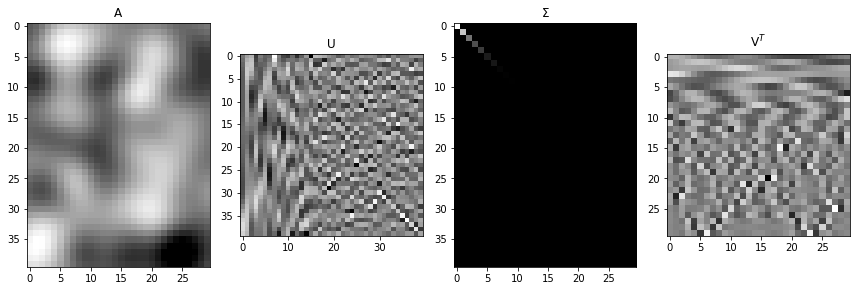

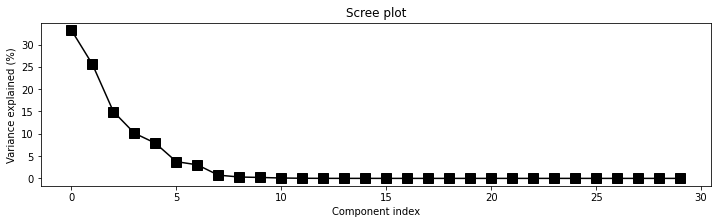

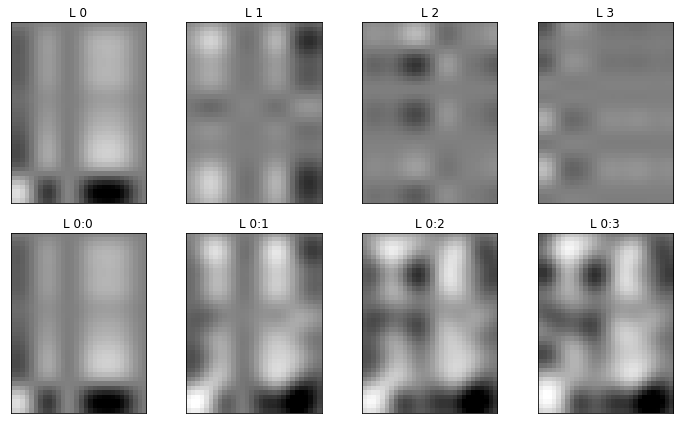

In [27]:
import numpy as np
import matplotlib.pyplot as plt

# create the matrix
m = 40
n = 30
# define a 2D Gaussian for smoothing
k = int((m+n)/4)
X,Y = np.meshgrid(np.linspace(-3,3,k),np.linspace(-3,3,k))
g2d = np.exp( -(X**2 + Y**2)/(k/8) )
# now for the matrix
from scipy.signal import convolve2d
A = convolve2d(np.random.randn(m,n),g2d,mode='same')

# SVD and create Sigma
U,s,Vt = np.linalg.svd(A)
S = np.zeros(np.shape(A))
np.fill_diagonal(S,s)

# visualize the matrices
# and show in a plot
_,axs = plt.subplots(1,4,figsize=(12,6))
axs[0].imshow(A, aspect='equal', cmap='gray', vmin=-10,vmax=10)
axs[0].set_title('A')
axs[1].imshow(U, aspect='equal', cmap='gray')
axs[1].set_title('U')
axs[2].imshow(S, aspect='equal', cmap='gray')
axs[2].set_title('$\Sigma$')
axs[3].imshow(Vt, aspect='equal', cmap='gray')
axs[3].set_title('V$^T$')
plt.tight_layout()
plt.savefig('Figure_a.png',dpi=300)
plt.show()
# and show the scree plot
plt.figure(figsize=(12,3))
plt.plot(100*s/np.sum(s),'ks-',markersize=10)
plt.xlabel('Component index')
plt.ylabel('Variance explained (%)')
plt.title('Scree plot')
plt.savefig('Figure_b.png',dpi=300)
plt.show()

## now show the first N "layers" separately and summed
numLayers = 4
rank1mats = np.zeros((numLayers,m,n))
# setup the figure
_,axs = plt.subplots(2,numLayers,figsize=(10,6))
# the loop
for i in range(numLayers):   
    # create this layer
    rank1mats[i,:,:] = np.outer(U[:,i],Vt[i,:])*S[i,i]   
    # show this layer
    axs[0,i].imshow(rank1mats[i,:,:],cmap='gray', vmin=-10,vmax=10)
    axs[0,i].set_title(f'L {i}')
    axs[0,i].set_xticks([]), axs[0,i].set_yticks([])
    # show the cumulative sum of layers
    axs[1,i].imshow(np.sum(rank1mats[:i+1,:,:],axis=0),cmap='gray', vmin=-10,vmax=10)
    axs[1,i].set_title(f'L 0:{i}')
    axs[1,i].set_xticks([]), axs[1,i].set_yticks([])
plt.tight_layout()
plt.savefig('Figure_c.png',dpi=300)
plt.show()
